In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_DataSets/Paris_dfmguest.csv',
                   encoding='utf8')

In [3]:
df.head(2)

,Unnamed: 0,bathrooms,bedrooms,bhk,dist_arprt,host_count,latitude,longitude,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,review_count,reviews,room_id,room_type
0,0,1.0,1.0,1.0,0.19109,478,48.888048,2.391798,6,2.0,Amerique,5.0,93.0,1,3682,7,1590108,Entire home/apt
1,1,1.0,1.0,1.0,0.19109,478,48.887168,2.393196,6,2.0,Amerique,4.5,73.0,1,3682,31,599113,Entire home/apt


In [4]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV, ElasticNet, LassoCV, Lasso

import patsy

In [6]:
df = df[df.price <= 1000]


In [7]:
df.shape

(41124, 17)

In [8]:
X = df[[x for x in df.columns if x not in ['bhk','price','latitude','longitude','room_id']]]
y = df.price.values
target = np.log(y)


In [9]:
formula = "target ~ "+' + '.join(X)+' -1'
formula

u'target ~ bathrooms + bedrooms + dist_arprt + host_count + metrostn_count + minstay + neighborhood + overall_satisfaction + rest_count + review_count + reviews + room_type -1'

In [10]:
y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')
y = y.values.ravel()

In [11]:
y

array([ 4.53259949,  4.29045944,  3.91202301, ...,  4.61512052,
        6.10479323,  4.49980967])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [13]:
X_train.shape, X_test.shape

((28786, 92), (12338, 92))

In [14]:
X_test.head(2)

,neighborhood[Amerique],neighborhood[Archives],neighborhood[Arsenal],neighborhood[Arts-et-Metiers],neighborhood[Auteuil],neighborhood[Batignolles],neighborhood[Bel-Air],neighborhood[Belleville],neighborhood[Bercy],neighborhood[Bonne-Nouvelle],...,bathrooms,bedrooms,dist_arprt,host_count,metrostn_count,minstay,overall_satisfaction,rest_count,review_count,reviews
11814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.270058,391.0,2.0,1.0,2.0,9.0,4076.0,0.0
6313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.201906,553.0,5.0,1.0,4.5,0.0,3724.0,32.0


In [15]:
linmod = LinearRegression()

In [16]:
scores = cross_val_score(linmod, X_train, y_train, cv = 10)
print scores
print np.mean(scores)
print np.std(scores)

[ 0.59147545  0.58500498  0.59158235  0.60882613  0.58781036  0.59341464
  0.57244723  0.55193836  0.58967754  0.58355985]
0.58557369055
0.0141525752514


In [17]:
predictions = cross_val_predict(linmod, X_test, y_test, cv = 10) 
accuracy = metrics.r2_score(y_test, predictions)
print accuracy


0.595390195935


In [18]:
residuals = y_test - predictions
residuals

array([ 0.5430328 , -0.01533895,  0.11340012, ..., -0.2313081 ,
       -0.323909  , -0.28879942])

In [19]:
np.mean(predictions)


4.5760311703168215

In [20]:
linmod.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
linmod.score(X_test, y_test)

0.59543154493600725

In [22]:
#linmod.coef_

In [23]:
print np.mean(y_train), np.mean(y_test)

4.5786852538 4.57591146089


In [24]:
# Regularization: Gridsearch an optimal ElasticNet regression

In [25]:
Xn = StandardScaler().fit_transform(X)

In [26]:
Xn_train, Xn_test, y_train, y_test = train_test_split(Xn, y, test_size = 0.3)

In [27]:
enet_cv = ElasticNetCV(l1_ratio=np.linspace(0.01, 1., 50), n_alphas=300, cv=10, verbose=1)
enet_cv.fit(Xn_train, y_train)


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=array([ 0.01   ,  0.0302 ,  0.05041,  0.07061,  0.09082,  0.11102,
        0.13122,  0.15143,  0.17163,  0.19184,  0.21204,  0.23224,
        0.25245,  0.27265,  0.29286,  0.31306,  0.33327,  0.35347,
        0.37367,  0.39388,  0.41408,  0.43429,  0.45449,  0.47469,
        0.4949 ,  0.515...3837,
        0.85857,  0.87878,  0.89898,  0.91918,  0.93939,  0.95959,
        0.9798 ,  1.     ]),
       max_iter=1000, n_alphas=300, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=1)

In [28]:
print enet_cv.l1_ratio_
print enet_cv.alpha_

0.777755102041
0.000392189144696


In [29]:
enet = ElasticNet(alpha= enet_cv.alpha_, l1_ratio=enet_cv.l1_ratio_)

y_pred_enet = enet.fit(Xn_train, y_train).predict(Xn_test)
r2_score_enet = metrics.r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)


ElasticNet(alpha=0.00039218914469564705, copy_X=True, fit_intercept=True,
      l1_ratio=0.77775510204081633, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.590473


In [30]:
lassocv = LassoCV(n_alphas=300, cv=10)

In [31]:
lassocv.fit(Xn_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=300, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [32]:
lassocv.alpha_

0.00030502710825206349

In [33]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso_model = lasso.fit(Xn_train, y_train)
y_pred_lasso = lasso_model.predict(Xn_test)
r2_score_lasso = metrics.r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)


Lasso(alpha=0.00030502710825206349, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.590475


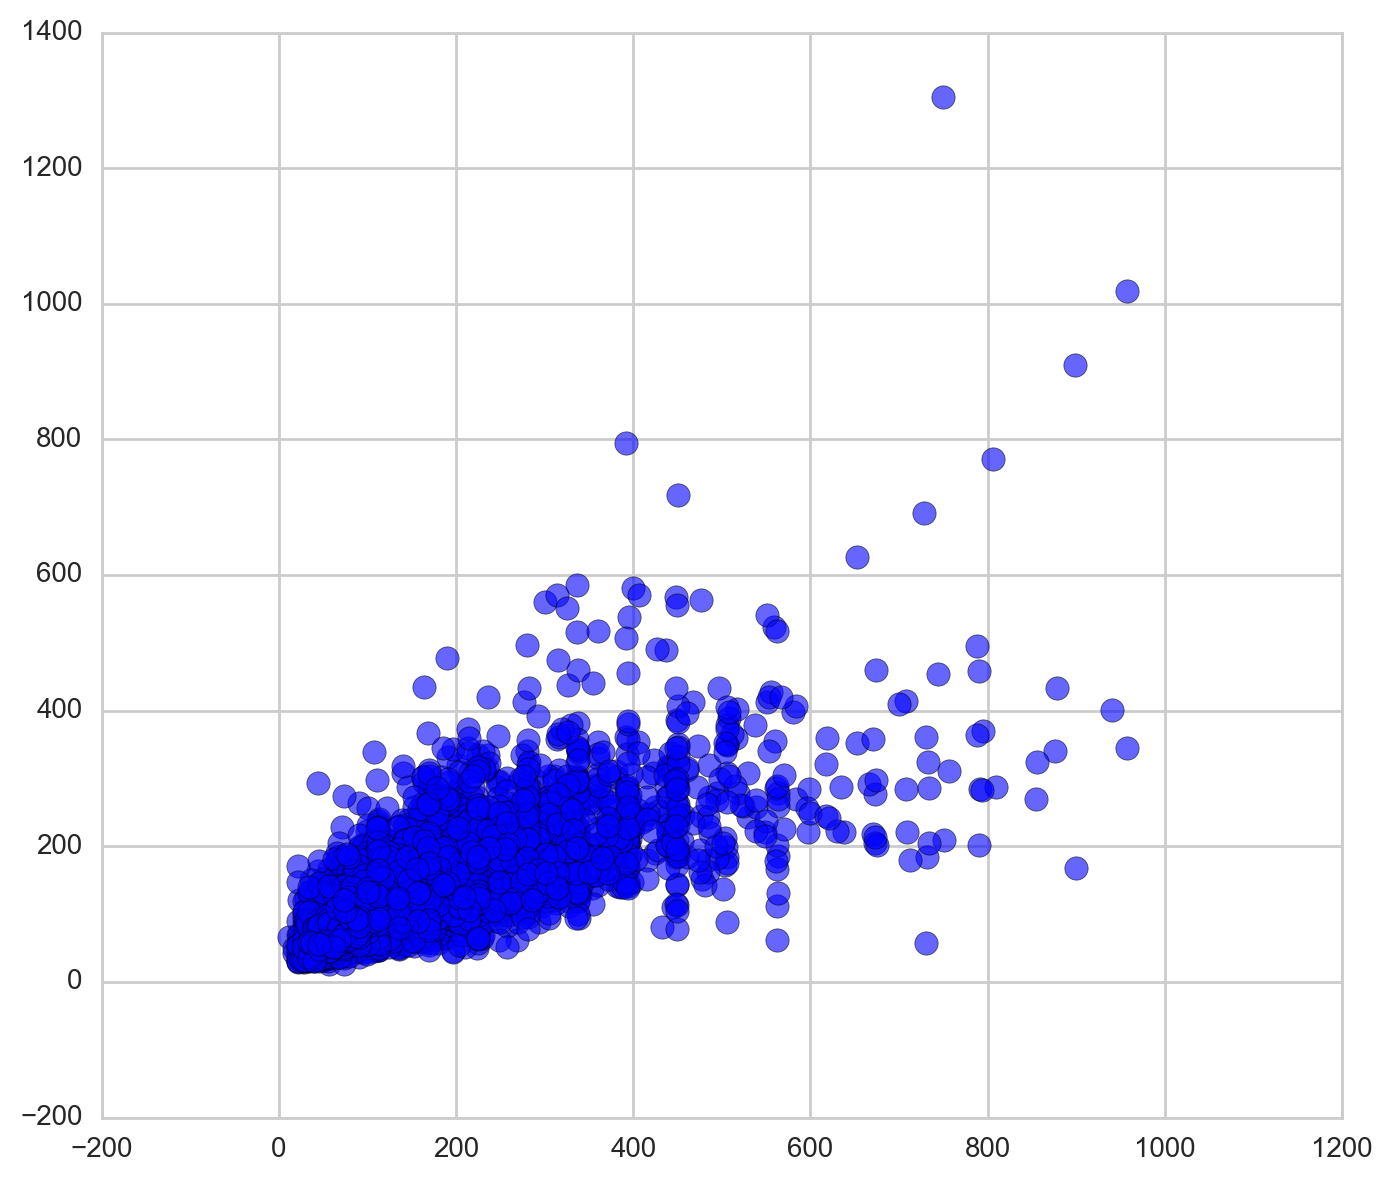

In [40]:
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(np.exp(y_test), np.exp(y_pred_lasso), s=70, alpha=0.6)
plt.show()

In [38]:
residuals = np.exp(y_test) - np.exp(y_pred_enet)

In [49]:
y_pred_enet_all = enet.fit(Xn_train, y_train).predict(Xn)


In [50]:
residuals_all = np.exp(y) - np.exp(y_pred_enet_all)

In [51]:
len(residuals_all)

41124

In [52]:
df['residuals'] = residuals_all

In [53]:
df.head(2)

,bathrooms,bedrooms,bhk,dist_arprt,host_count,latitude,longitude,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,review_count,reviews,room_id,room_type,residuals
0,1.0,1.0,1.0,0.19109,478,48.888048,2.391798,6,2.0,Amerique,5.0,93.0,1,3682,7,1590108,Entire home/apt,22.501040
1,1.0,1.0,1.0,0.19109,478,48.887168,2.393196,6,2.0,Amerique,4.5,73.0,1,3682,31,599113,Entire home/apt,2.577385


In [56]:
df = df[df['residuals']<0]

In [58]:
df = df.reset_index(drop=True)

In [59]:
df.head(2)

,bathrooms,bedrooms,bhk,dist_arprt,host_count,latitude,longitude,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,review_count,reviews,room_id,room_type,residuals
0,1.0,1.0,1.0,0.19109,478,48.880803,2.389111,6,7.0,Amerique,4.0,50.0,1,3682,9,911630,Entire home/apt,-20.452941
1,1.0,3.0,3.0,0.19109,478,48.878634,2.389515,6,2.0,Amerique,5.0,111.0,1,3682,23,483777,Entire home/apt,-26.677622


In [60]:
df.to_csv(path_or_buf='/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Paris_dfwithres.csv')